# K Means Clustering

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Allocating the Columns

In [4]:
x = df.iloc[:,3:5].values

### using Elbow method to find optimal no. of clusters

In [8]:
from sklearn.cluster import KMeans
wcs=[]
for i in range(1,11):
    km= KMeans(n_clusters= i, init='k-means++' , max_iter= 300, n_init=10, random_state=0)
    km.fit(x)
    wcs.append(km.inertia_)

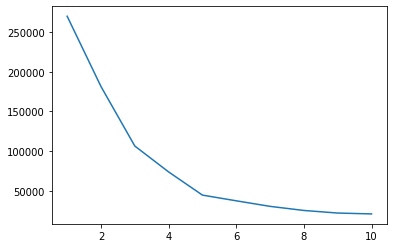

In [9]:
plt.plot(range(1,11), wcs)


### choose the value where elbow takes the bend

In [10]:
# making predictions

In [11]:
km= KMeans(n_clusters= 5, init='k-means++' , max_iter= 300, n_init=10, random_state=0)
ypr= km.fit_predict(x)

### Plotting the clusters

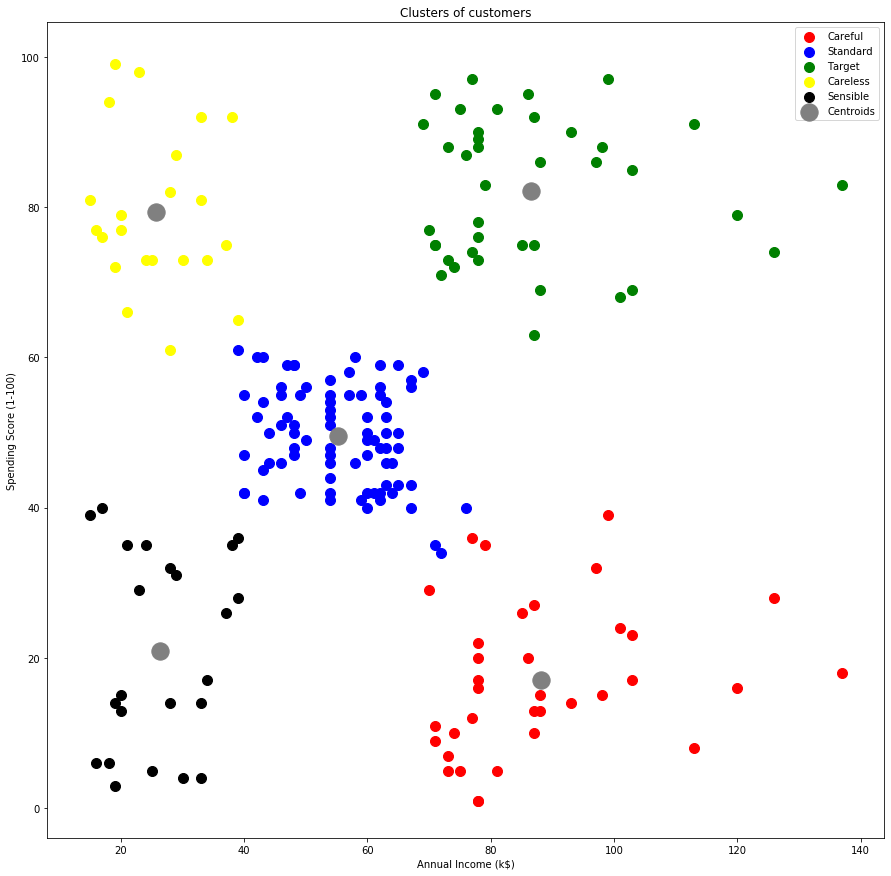

In [17]:
plt.figure(figsize=(15,15))
plt.scatter(x[ypr == 0, 0], x[ypr == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(x[ypr == 1, 0], x[ypr == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(x[ypr == 2, 0], x[ypr == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(x[ypr == 3, 0], x[ypr == 3, 1], s = 100, c = 'yellow', label = 'Careless')
plt.scatter(x[ypr == 4, 0], x[ypr == 4, 1], s = 100, c = 'black', label = 'Sensible')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'grey', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierarchical Clustering

### Creating the dendrogram

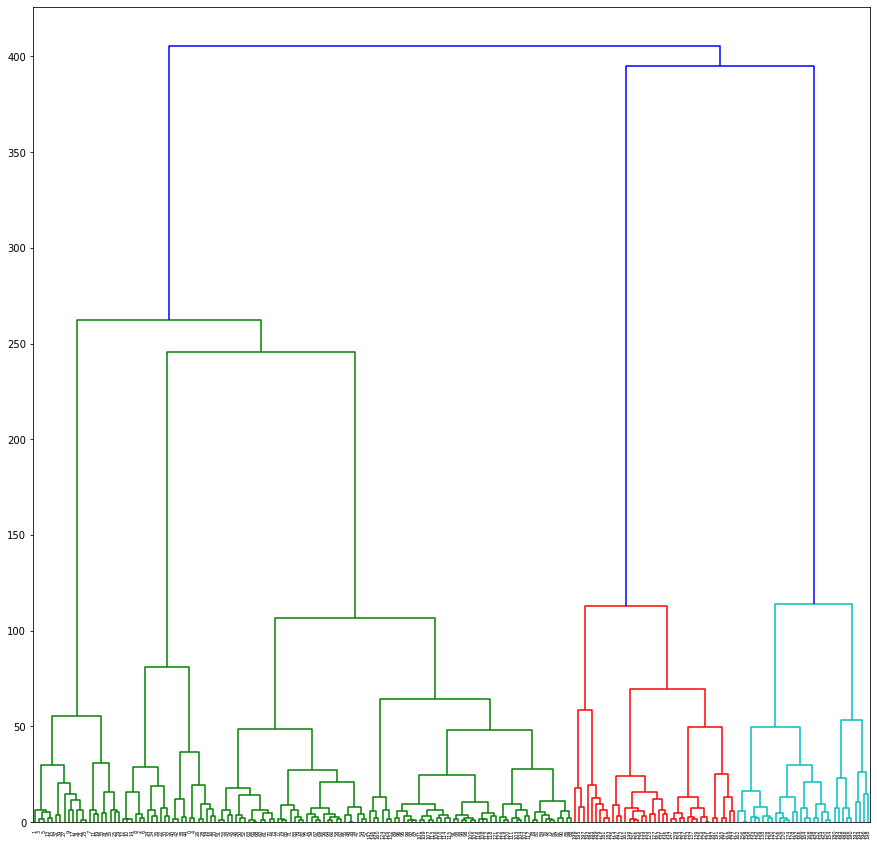

In [22]:
plt.figure(figsize=(15, 15))
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(x, method='ward'))


### now we choose the largest line which hasn't been cut


### this implies that this dataset will have FIVE CLUSTERS

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters= 5, affinity='euclidean', linkage='ward')
yhc = hc.fit_predict(x)

### Plotting the CLUSTERS

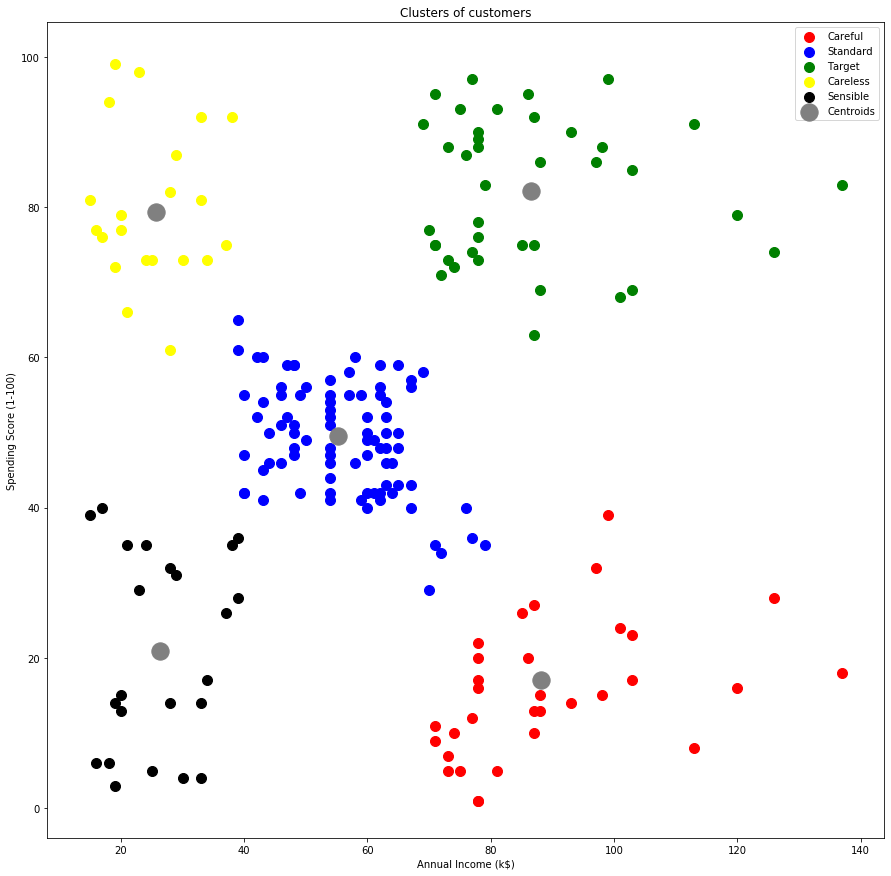

In [26]:
plt.figure(figsize=(15,15))
plt.scatter(x[yhc == 0, 0], x[yhc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(x[yhc == 1, 0], x[yhc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(x[yhc == 2, 0], x[yhc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(x[yhc == 3, 0], x[yhc == 3, 1], s = 100, c = 'yellow', label = 'Careless')
plt.scatter(x[yhc == 4, 0], x[yhc == 4, 1], s = 100, c = 'black', label = 'Sensible')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'grey', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()